## GD - Linear regression but we have kept m constant

In [146]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [147]:
X,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20)

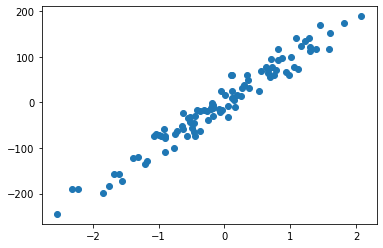

In [148]:
plt.scatter(X,y)

In [149]:
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [150]:
lr.coef_

array([94.30072989])

In [151]:
lr.intercept_

2.6586315783984906

In [185]:
X

array([[ 1.28309541],
       [ 1.11289677],
       [-0.45901428],
       [ 0.01276213],
       [ 0.12806778],
       [-0.41862208],
       [ 1.81994439],
       [-1.39601865],
       [ 1.45412952],
       [-0.08134586],
       [ 2.07996184],
       [-0.18660891],
       [-1.68426914],
       [-2.31292972],
       [-0.63163199],
       [-0.56133592],
       [-1.74884766],
       [ 0.72637372],
       [ 1.08746703],
       [-0.0496859 ],
       [ 0.10743787],
       [ 0.18616775],
       [ 0.52252559],
       [-0.24550982],
       [-0.62919903],
       [ 0.75921668],
       [-0.45394163],
       [-2.22133029],
       [ 1.58593756],
       [-1.84211034],
       [-0.06591129],
       [-0.95749381],
       [-0.90514961],
       [ 0.93267232],
       [-0.36817743],
       [-1.59971104],
       [-0.16994813],
       [ 0.87132405],
       [ 1.30571808],
       [-0.91269678],
       [-1.31144502],
       [ 0.33592184],
       [ 1.2201393 ],
       [-0.30494974],
       [ 0.04643823],
       [ 0

In [186]:
lr.predict(np.array([1.28309541]).reshape(1,1))

array([123.65546526])

In [152]:
np.mean(cross_val_score(lr,X,y,scoring='r2',cv=10))

0.9447894105727972

In [153]:
m = 94.300729

In [157]:
class GDRegressor:
    def __init__(self,learning_rate,epochs):
        self.m = m
        self.b = 0
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        #calculate b using GD
        for i in range(self.epochs):
            slope = -2 * np.sum(y - self.m*X.ravel() - self.b)
            self.b = self.b - slope * self.lr
        print(self.b)

In [158]:
gd = GDRegressor(0.001,200)

In [159]:
gd.fit(X,y)  

2.658631525298451


## Notes
- For irregular output tune learning rate and epoch value

## Full GD

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [174]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [168]:
class GDRegressor:
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        
    def fit(self,X,y):
        #calculate b using GD
        
        for i in range(self.epochs):
            b_slope = -2 * np.sum(y - self.m*X.ravel() - self.b)
            self.b = self.b - (b_slope * self.lr)
            
            m_slope = -2 * np.sum((y - self.m*X.ravel() - self.b)*X.ravel())
            self.m = self.m - (m_slope * self.lr)
            
        print("b = ",self.b, " and m = ",self.m)
    
    def predict(self,X):
        return self.m * X + self.b

In [169]:
gd = GDRegressor(0.001,100)

In [175]:
gd.fit(X_train,y_train)  

b =  3.75315017008157  and m =  93.45420452679906


In [177]:
y_pred =  gd.predict(X_test)

In [178]:
y_pred

array([[ -49.57347029],
       [  -2.40653721],
       [ -12.56194043],
       [ -55.04814513],
       [-159.68401701],
       [ -19.19077442],
       [ -39.14366459],
       [-203.83950463],
       [ 151.96568368],
       [-212.399857  ],
       [ -30.80337925],
       [  79.15479404],
       [ -45.07717801],
       [ -55.27551512],
       [ 123.66381086],
       [  21.15130913],
       [   4.94582452],
       [-168.39980646],
       [  14.3662905 ],
       [-141.47263793]])

In [180]:
r2_score(y_pred,y_test)

0.9437935069549906